In [69]:
import pandas as pd

In [70]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.device_count())
print(torch.cuda.get_device_name(0))

True
1
NVIDIA GeForce RTX 4060 Laptop GPU


In [71]:
dfRevue= pd.read_csv("Books_rating_t 2.csv/Books_rating_t.csv", nrows=10000)
dfRevue = dfRevue.dropna(subset=["Titre", "revue/score", "revue/résumé", "revue/texte"])
dfRevue = dfRevue[["Titre", "revue/score", "revue/résumé", "revue/texte"]]

In [72]:
dfRevue.head(1000)

,Titre,revue/score,revue/résumé,revue/texte
0,Its Only Art If Its Well Hung!,4.0,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,Dr. Seuss: American Icon,5.0,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,Dr. Seuss: American Icon,5.0,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,Dr. Seuss: American Icon,4.0,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,Dr. Seuss: American Icon,4.0,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...
...,...,...,...,...
995,The Rabbi's Cat,1.0,Unpleasant and disappointing,"This is a nasty, mean-spirited book that exhib..."
996,The Rabbi's Cat,3.0,Grafic Novels,Our book club tried the Rabbi's Cat to see wha...
997,The Rabbi's Cat,1.0,Self-Serving Message,"This is the tale of a kindly Rabbi, his sweet ..."
998,The Rabbi's Cat,1.0,Not what it looks like on the cover.,As someone who is interested in different cult...


In [73]:
print(dfRevue.dtypes)

Titre            object
revue/score     float64
revue/résumé     object
revue/texte      object
dtype: object


                                          revue/texte sentiment_pred
0   The other reviews sum up the book nicely. It i...       POSITIVE
1   I saw this book at the local bookstore and hav...       POSITIVE
2   This book is exactly what I was looking for. I...       POSITIVE
3   As a student I find the Complete Reference a u...       POSITIVE
4   Don't believe the book's cover. The reference ...       NEGATIVE
..                                                ...            ...
95  For some strange reason which I have never bee...       NEGATIVE
96  I heartily endorse this book for dog people, a...       POSITIVE
97  I am 60 years old..I received this book on my ...       POSITIVE
98  I think this book is a must read for all famil...       POSITIVE
99  This book is wonderful. It is a classic and sh...       POSITIVE

[100 rows x 2 columns]


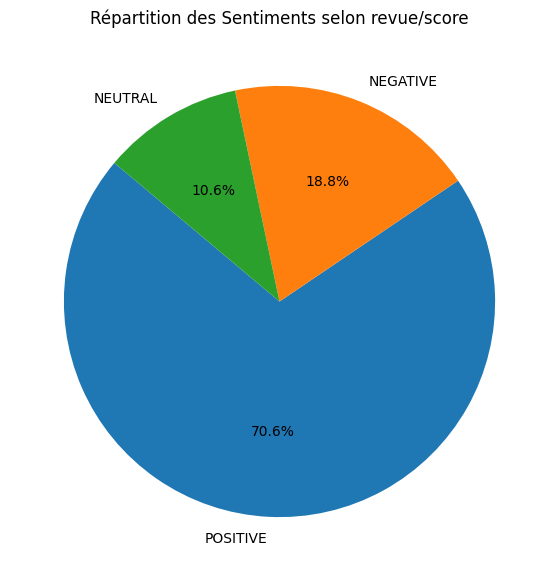

In [74]:
dfRevuePredire= pd.read_csv("books_data_reviews.csv")
dfRevuePredire = dfRevuePredire.dropna(subset=["Titre", "revue/score", "revue/résumé", "revue/texte"])
dfRevuePredire = dfRevuePredire[["Titre", "revue/score", "revue/résumé", "revue/texte"]]

import matplotlib.pyplot as plt

def assign_polarity(score):
    if score > 3:
        return "POSITIVE"
    elif score < 3:
        return "NEGATIVE"
    else:
        return "NEUTRAL"

dfRevuePredire["sentiment_pred"] = dfRevuePredire["revue/score"].apply(assign_polarity)

print(dfRevuePredire[["revue/texte", "sentiment_pred"]].head(100))

sentiment_counts = dfRevuePredire["sentiment_pred"].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct="%1.1f%%", startangle=140)
plt.title("Répartition des Sentiments selon revue/score")
plt.show()

# Prédiction selon le score

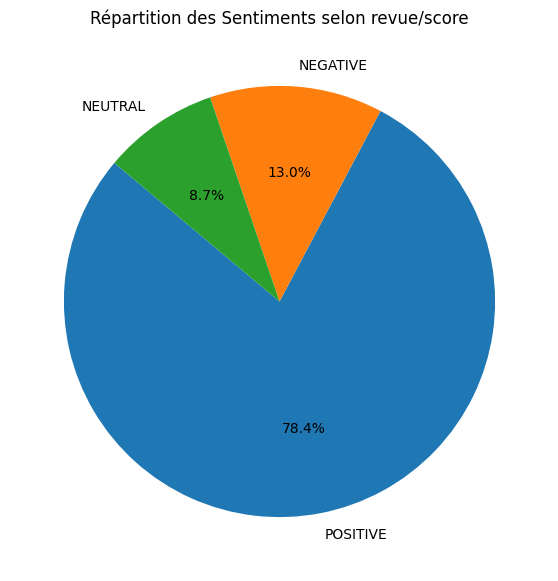

In [103]:
import matplotlib.pyplot as plt

def assign_polarity(score):
    if score > 3:
        return "POSITIVE"
    elif score < 3:
        return "NEGATIVE"
    else:
        return "NEUTRAL"

dfRevue["sentiment_pred"] = dfRevue["revue/score"].apply(assign_polarity)

sentiment_counts = dfRevue["sentiment_pred"].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct="%1.1f%%", startangle=140)
plt.title("Répartition des Sentiments selon revue/score")
plt.show()

# Prédiction par modèle

## Préparation

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

dfRevue = dfRevue[["revue/texte", "revue/score"]].dropna()

X = dfRevue["revue/texte"]
y = dfRevue["revue/score"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Répresentation

### Bag of words

In [77]:
dfRevuePredire.head()

,Titre,revue/score,revue/résumé,revue/texte,sentiment_pred
0,Visual Basic 6 Master Reference,4.0,Good as far as it goes,The other reviews sum up the book nicely. It i...,POSITIVE
1,Visual Basic 6 Master Reference,4.0,I saw this in the bookstore and...,I saw this book at the local bookstore and hav...,POSITIVE
2,Visual Basic 6 Master Reference,4.0,Exactly what I was looking for,This book is exactly what I was looking for. I...,POSITIVE
3,Visual Basic 6 Master Reference,4.0,"Great reference, but that's all.",As a student I find the Complete Reference a u...,POSITIVE
4,Visual Basic 6 Master Reference,2.0,Not very complete. Too many ActiveX controls m...,Don't believe the book's cover. The reference ...,NEGATIVE


In [78]:
vectorizer_bow = CountVectorizer(max_features=5000)
X_train_bow = vectorizer_bow.fit_transform(X_train)
X_test_bow = vectorizer_bow.transform(X_test)

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

model_lr = LinearRegression()
model_lr.fit(X_train_bow, y_train)

X_predire_bow = vectorizer_bow.transform(dfRevuePredire["revue/texte"])
dfRevuePredire["revue/score/LNBag"] = model_lr.predict(X_predire_bow)

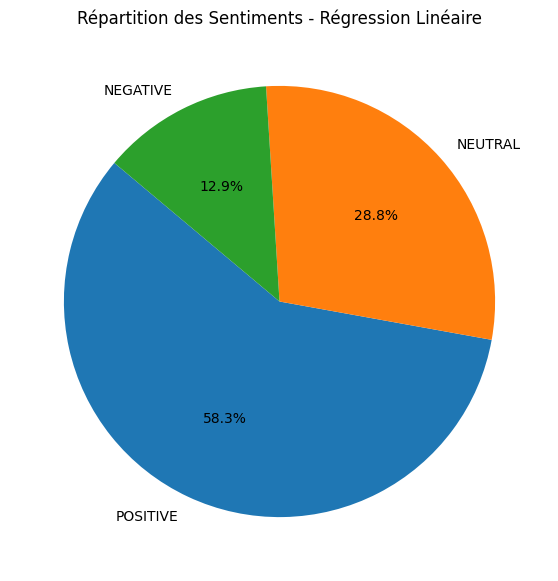

In [104]:
import matplotlib.pyplot as plt

def assign_polarity(score):
    if score > 3.9:
        return "POSITIVE"
    elif score < 2.1:
        return "NEGATIVE"
    else:
        return "NEUTRAL"

dfRevuePredire["sentiment_pred"] = dfRevuePredire["revue/score/LNBag"].apply(assign_polarity)

sentiment_counts = dfRevuePredire["sentiment_pred"].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct="%1.1f%%", startangle=140)
plt.title("Répartition des Sentiments - Régression Linéaire")
plt.show()

In [81]:
dfRevuePredire.head()

,Titre,revue/score,revue/résumé,revue/texte,sentiment_pred,revue/score/LNBag
0,Visual Basic 6 Master Reference,4.0,Good as far as it goes,The other reviews sum up the book nicely. It i...,NEGATIVE,1.199987
1,Visual Basic 6 Master Reference,4.0,I saw this in the bookstore and...,I saw this book at the local bookstore and hav...,NEUTRAL,2.983159
2,Visual Basic 6 Master Reference,4.0,Exactly what I was looking for,This book is exactly what I was looking for. I...,POSITIVE,4.501644
3,Visual Basic 6 Master Reference,4.0,"Great reference, but that's all.",As a student I find the Complete Reference a u...,NEUTRAL,3.305589
4,Visual Basic 6 Master Reference,2.0,Not very complete. Too many ActiveX controls m...,Don't believe the book's cover. The reference ...,NEGATIVE,1.741163


In [82]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(n_estimators=20, max_depth=10, random_state=42, n_jobs=-1)
model_rf.fit(X_train_bow, y_train)

dfRevuePredire["revue/score/rfBag"] = model_rf.predict(X_predire_bow)

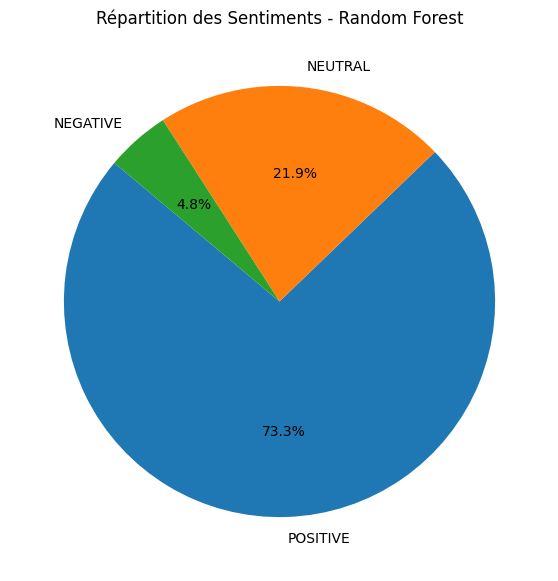

In [83]:
dfRevuePredire["sentiment_pred"] = dfRevuePredire["revue/score/rfBag"].apply(assign_polarity)

sentiment_counts = dfRevuePredire["sentiment_pred"].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct="%1.1f%%", startangle=140)
plt.title("Répartition des Sentiments - Random Forest")
plt.show()

In [84]:
dfRevuePredire.head()

,Titre,revue/score,revue/résumé,revue/texte,sentiment_pred,revue/score/LNBag,revue/score/rfBag
0,Visual Basic 6 Master Reference,4.0,Good as far as it goes,The other reviews sum up the book nicely. It i...,NEUTRAL,1.199987,3.743643
1,Visual Basic 6 Master Reference,4.0,I saw this in the bookstore and...,I saw this book at the local bookstore and hav...,POSITIVE,2.983159,4.210587
2,Visual Basic 6 Master Reference,4.0,Exactly what I was looking for,This book is exactly what I was looking for. I...,POSITIVE,4.501644,4.205292
3,Visual Basic 6 Master Reference,4.0,"Great reference, but that's all.",As a student I find the Complete Reference a u...,NEUTRAL,3.305589,3.938171
4,Visual Basic 6 Master Reference,2.0,Not very complete. Too many ActiveX controls m...,Don't believe the book's cover. The reference ...,NEUTRAL,1.741163,3.643957


In [85]:
from sklearn.neighbors import KNeighborsRegressor

model_knn = KNeighborsRegressor(n_neighbors=5)
model_knn.fit(X_train_bow, y_train)

dfRevuePredire["revue/score/knnBag"] = model_knn.predict(X_predire_bow)

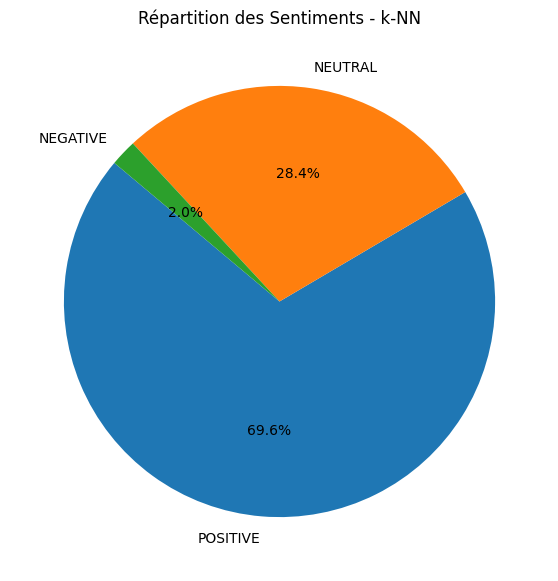

In [86]:
dfRevuePredire["sentiment_pred"] = dfRevuePredire["revue/score/knnBag"].apply(assign_polarity)

sentiment_counts = dfRevuePredire["sentiment_pred"].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct="%1.1f%%", startangle=140)
plt.title("Répartition des Sentiments - k-NN")
plt.show()

In [87]:
dfRevuePredire.head()

,Titre,revue/score,revue/résumé,revue/texte,sentiment_pred,revue/score/LNBag,revue/score/rfBag,revue/score/knnBag
0,Visual Basic 6 Master Reference,4.0,Good as far as it goes,The other reviews sum up the book nicely. It i...,NEUTRAL,1.199987,3.743643,3.6
1,Visual Basic 6 Master Reference,4.0,I saw this in the bookstore and...,I saw this book at the local bookstore and hav...,POSITIVE,2.983159,4.210587,4.2
2,Visual Basic 6 Master Reference,4.0,Exactly what I was looking for,This book is exactly what I was looking for. I...,POSITIVE,4.501644,4.205292,4.6
3,Visual Basic 6 Master Reference,4.0,"Great reference, but that's all.",As a student I find the Complete Reference a u...,POSITIVE,3.305589,3.938171,4.6
4,Visual Basic 6 Master Reference,2.0,Not very complete. Too many ActiveX controls m...,Don't believe the book's cover. The reference ...,NEUTRAL,1.741163,3.643957,3.4


                                          revue/texte sentiment_pred
0   The other reviews sum up the book nicely. It i...        NEUTRAL
1   I saw this book at the local bookstore and hav...        NEUTRAL
2   This book is exactly what I was looking for. I...        NEUTRAL
3   As a student I find the Complete Reference a u...        NEUTRAL
4   Don't believe the book's cover. The reference ...       NEGATIVE
..                                                ...            ...
95  For some strange reason which I have never bee...       NEGATIVE
96  I heartily endorse this book for dog people, a...       POSITIVE
97  I am 60 years old..I received this book on my ...       POSITIVE
98  I think this book is a must read for all famil...       POSITIVE
99  This book is wonderful. It is a classic and sh...       POSITIVE

[100 rows x 2 columns]


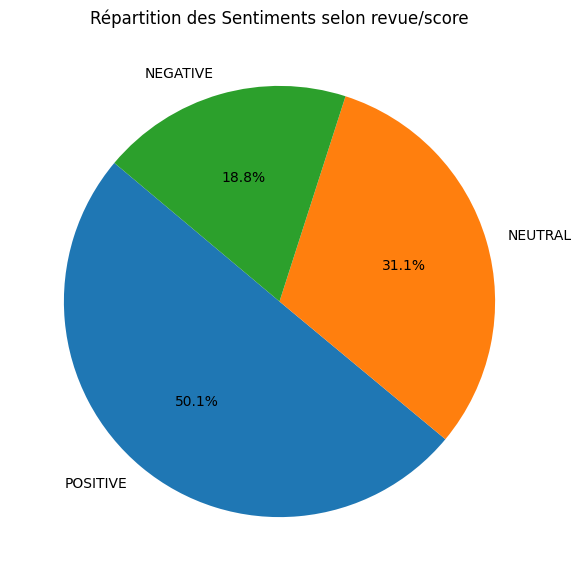

In [88]:
import matplotlib.pyplot as plt

dfRevuePredire["sentiment_pred"] = dfRevuePredire["revue/score"].apply(assign_polarity)

print(dfRevuePredire[["revue/texte", "sentiment_pred"]].head(100))

sentiment_counts = dfRevuePredire["sentiment_pred"].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct="%1.1f%%", startangle=140)
plt.title("Répartition des Sentiments selon revue/score")
plt.show()


### TF-IDF

In [89]:
vectorizer_tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer_tfidf.fit_transform(X_train)
X_test_tfidf = vectorizer_tfidf.transform(X_test)

In [90]:
dfRevuePredire.head()

,Titre,revue/score,revue/résumé,revue/texte,sentiment_pred,revue/score/LNBag,revue/score/rfBag,revue/score/knnBag
0,Visual Basic 6 Master Reference,4.0,Good as far as it goes,The other reviews sum up the book nicely. It i...,NEUTRAL,1.199987,3.743643,3.6
1,Visual Basic 6 Master Reference,4.0,I saw this in the bookstore and...,I saw this book at the local bookstore and hav...,NEUTRAL,2.983159,4.210587,4.2
2,Visual Basic 6 Master Reference,4.0,Exactly what I was looking for,This book is exactly what I was looking for. I...,NEUTRAL,4.501644,4.205292,4.6
3,Visual Basic 6 Master Reference,4.0,"Great reference, but that's all.",As a student I find the Complete Reference a u...,NEUTRAL,3.305589,3.938171,4.6
4,Visual Basic 6 Master Reference,2.0,Not very complete. Too many ActiveX controls m...,Don't believe the book's cover. The reference ...,NEGATIVE,1.741163,3.643957,3.4


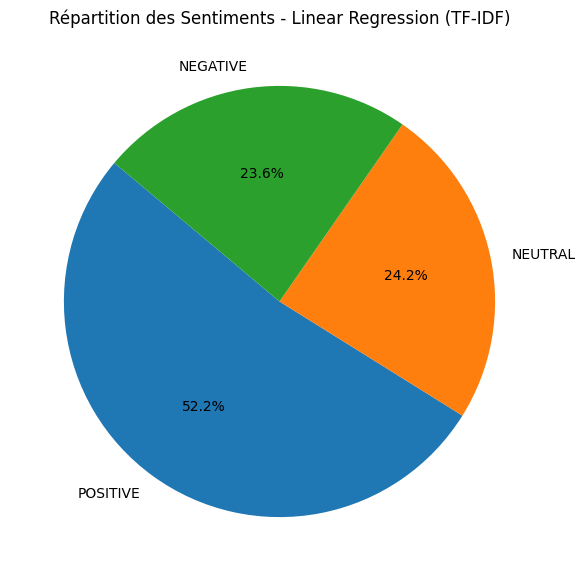

In [91]:
from sklearn.linear_model import LinearRegression

model_lr_tfidf = LinearRegression()
model_lr_tfidf.fit(X_train_tfidf, y_train)

X_predire_tfidf = vectorizer_tfidf.transform(dfRevuePredire["revue/texte"])
dfRevuePredire["revue/score/lnTfIdf"] = model_lr_tfidf.predict(X_predire_tfidf)

dfRevuePredire["sentiment_pred"] = dfRevuePredire["revue/score/lnTfIdf"].apply(assign_polarity)
sentiment_counts = dfRevuePredire["sentiment_pred"].value_counts()

import matplotlib.pyplot as plt
plt.figure(figsize=(7, 7))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct="%1.1f%%", startangle=140)
plt.title("Répartition des Sentiments - Linear Regression (TF-IDF)")
plt.show()


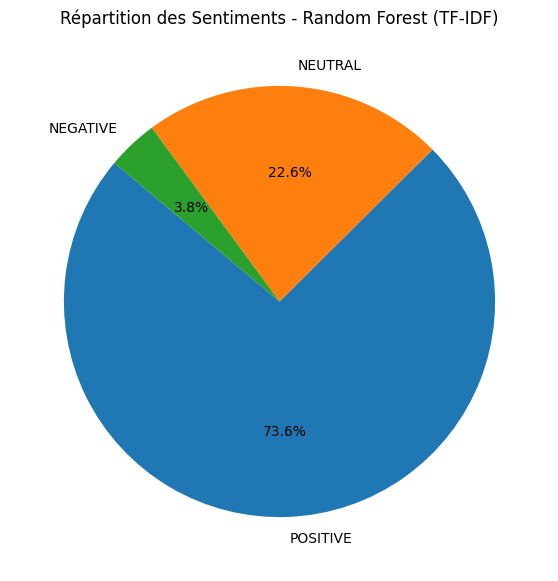

In [92]:
from sklearn.ensemble import RandomForestRegressor

model_rf_tfidf = RandomForestRegressor(n_estimators=20, max_depth=10, random_state=42, n_jobs=-1)
model_rf_tfidf.fit(X_train_tfidf, y_train) 

X_predire_tfidf = vectorizer_tfidf.transform(dfRevuePredire["revue/texte"])
dfRevuePredire["revue/score/rfTfIdf"] = model_rf_tfidf.predict(X_predire_tfidf)

dfRevuePredire["sentiment_pred"] = dfRevuePredire["revue/score/rfTfIdf"].apply(assign_polarity)
sentiment_counts = dfRevuePredire["sentiment_pred"].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct="%1.1f%%", startangle=140)
plt.title("Répartition des Sentiments - Random Forest (TF-IDF)")
plt.show()


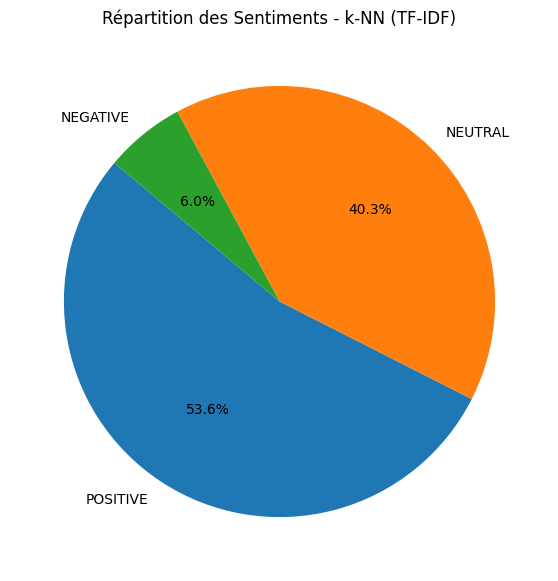

In [93]:
from sklearn.neighbors import KNeighborsRegressor

model_knn_tfidf = KNeighborsRegressor(n_neighbors=5)
model_knn_tfidf.fit(X_train_tfidf, y_train)

X_predire_tfidf = vectorizer_tfidf.transform(dfRevuePredire["revue/texte"])
dfRevuePredire["revue/score/knnTfIdf"] = model_knn_tfidf.predict(X_predire_tfidf)

dfRevuePredire["sentiment_pred"] = dfRevuePredire["revue/score/knnTfIdf"].apply(assign_polarity)
sentiment_counts = dfRevuePredire["sentiment_pred"].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct="%1.1f%%", startangle=140)
plt.title("Répartition des Sentiments - k-NN (TF-IDF)")
plt.show()


In [94]:
dfRevuePredire.head()

,Titre,revue/score,revue/résumé,revue/texte,sentiment_pred,revue/score/LNBag,revue/score/rfBag,revue/score/knnBag,revue/score/lnTfIdf,revue/score/rfTfIdf,revue/score/knnTfIdf
0,Visual Basic 6 Master Reference,4.0,Good as far as it goes,The other reviews sum up the book nicely. It i...,POSITIVE,1.199987,3.743643,3.6,3.693172,3.766213,4.4
1,Visual Basic 6 Master Reference,4.0,I saw this in the bookstore and...,I saw this book at the local bookstore and hav...,POSITIVE,2.983159,4.210587,4.2,3.940794,4.229324,4.4
2,Visual Basic 6 Master Reference,4.0,Exactly what I was looking for,This book is exactly what I was looking for. I...,NEUTRAL,4.501644,4.205292,4.6,5.226257,4.251014,4.0
3,Visual Basic 6 Master Reference,4.0,"Great reference, but that's all.",As a student I find the Complete Reference a u...,POSITIVE,3.305589,3.938171,4.6,3.435142,4.210703,4.2
4,Visual Basic 6 Master Reference,2.0,Not very complete. Too many ActiveX controls m...,Don't believe the book's cover. The reference ...,NEGATIVE,1.741163,3.643957,3.4,0.770146,3.349415,2.8


In [95]:
predicted_cols = [
    "revue/score/LNBag",
    "revue/score/rfBag",
    "revue/score/knnBag",
    "revue/score/lnTfIdf",
    "revue/score/rfTfIdf",
    "revue/score/knnTfIdf"
]

results = {}
for col in predicted_cols:
    correct = (abs(dfRevuePredire[col] - dfRevuePredire["revue/score"]) <= 0.9).sum()
    total = len(dfRevuePredire)
    results[col] = correct / total

for col, rate in results.items():
    print(f"{col}: {rate:.2%}")


revue/score/LNBag: 40.17%
revue/score/rfBag: 63.72%
revue/score/knnBag: 59.67%
revue/score/lnTfIdf: 45.21%
revue/score/rfTfIdf: 63.22%
revue/score/knnTfIdf: 59.09%


### Embeddings

In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch
import numpy as np

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f" Device set to: {device.upper()}")

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModel.from_pretrained("bert-base-uncased").to(device)

def embed_texts(texts, batch_size=16):
    embeddings = []
    
    for i in range(0, len(texts), batch_size):
        batch = texts[i : i + batch_size]
        tokens = tokenizer(batch, padding="max_length", truncation=True, max_length=512, return_tensors="pt")
        
        tokens = {key: val.to(device) for key, val in tokens.items()}
        with torch.no_grad():
            output = model(**tokens)
        
        batch_embeddings = output.last_hidden_state.mean(dim=1).cpu().numpy()
        embeddings.append(batch_embeddings)
    
    return np.vstack(embeddings)

X_train_bert = embed_texts(X_train.tolist())
X_test_bert = embed_texts(X_test.tolist())

print(f"X_train_bert shape : {X_train_bert.shape}")
print(f"X_test_bert shape  : {X_test_bert.shape}")


 Device set to: CUDA
X_train_bert shape : (7997, 768)
X_test_bert shape  : (2000, 768)


In [97]:
X_predire_bert = embed_texts(dfRevuePredire["revue/texte"].tolist())
print(f"X_predire_bert shape : {X_predire_bert.shape}")

X_predire_bert shape : (1210, 768)


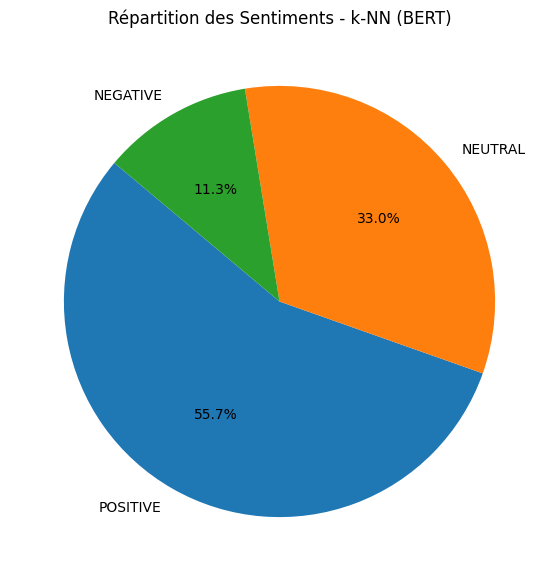

In [98]:
from sklearn.neighbors import KNeighborsRegressor

model_knn_bert = KNeighborsRegressor(n_neighbors=5)
model_knn_bert.fit(X_train_bert, y_train)
dfRevuePredire["revue/score/knnBERT"] = model_knn_bert.predict(X_predire_bert)

dfRevuePredire["sentiment_pred"] = dfRevuePredire["revue/score/knnBERT"].apply(assign_polarity)
sentiment_counts = dfRevuePredire["sentiment_pred"].value_counts()

import matplotlib.pyplot as plt
plt.figure(figsize=(7, 7))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct="%1.1f%%", startangle=140)
plt.title("Répartition des Sentiments - k-NN (BERT)")
plt.show()


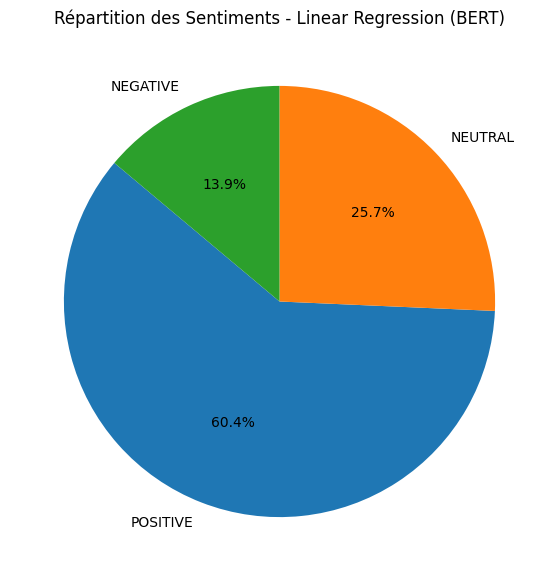

In [99]:
from sklearn.linear_model import LinearRegression

model_lr_bert = LinearRegression()
model_lr_bert.fit(X_train_bert, y_train)
dfRevuePredire["revue/score/lnBERT"] = model_lr_bert.predict(X_predire_bert)

dfRevuePredire["sentiment_pred"] = dfRevuePredire["revue/score/lnBERT"].apply(assign_polarity)
sentiment_counts = dfRevuePredire["sentiment_pred"].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct="%1.1f%%", startangle=140)
plt.title("Répartition des Sentiments - Linear Regression (BERT)")
plt.show()


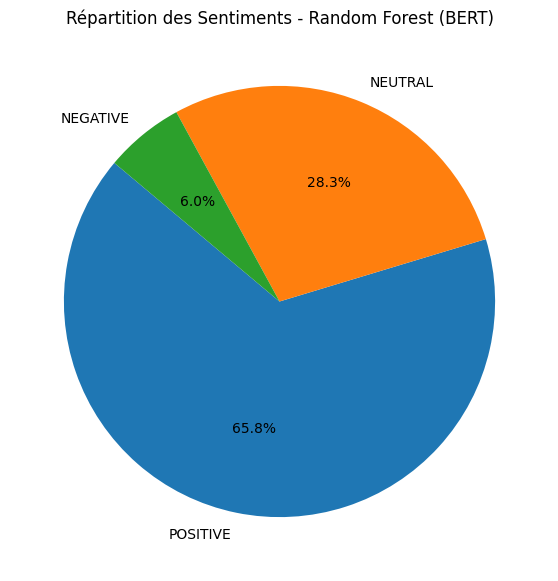

In [100]:
from sklearn.ensemble import RandomForestRegressor

model_rf_bert = RandomForestRegressor(n_estimators=20, max_depth=10, random_state=42, n_jobs=-1)
model_rf_bert.fit(X_train_bert, y_train)
dfRevuePredire["revue/score/rfBERT"] = model_rf_bert.predict(X_predire_bert)

dfRevuePredire["sentiment_pred"] = dfRevuePredire["revue/score/rfBERT"].apply(assign_polarity)
sentiment_counts = dfRevuePredire["sentiment_pred"].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct="%1.1f%%", startangle=140)
plt.title("Répartition des Sentiments - Random Forest (BERT)")
plt.show()


In [101]:
dfRevuePredire[["revue/score","revue/score/LNBag","revue/score/rfBag","revue/score/knnBag","revue/score/lnTfIdf","revue/score/rfTfIdf","revue/score/knnTfIdf","revue/score/lnBERT","revue/score/knnBERT", "revue/score/rfBERT"]].head()

,revue/score,revue/score/LNBag,revue/score/rfBag,revue/score/knnBag,revue/score/lnTfIdf,revue/score/rfTfIdf,revue/score/knnTfIdf,revue/score/lnBERT,revue/score/knnBERT,revue/score/rfBERT
0,4.0,1.199987,3.743643,3.6,3.693172,3.766213,4.4,3.466682,3.8,3.429791
1,4.0,2.983159,4.210587,4.2,3.940794,4.229324,4.4,3.913979,4.8,4.063347
2,4.0,4.501644,4.205292,4.6,5.226257,4.251014,4.0,4.293533,4.6,3.743611
3,4.0,3.305589,3.938171,4.6,3.435142,4.210703,4.2,3.313576,4.0,4.719051
4,2.0,1.741163,3.643957,3.4,0.770146,3.349415,2.8,2.463631,2.2,3.409674


In [102]:
predicted_cols = [
    "revue/score/LNBag",
    "revue/score/rfBag",
    "revue/score/knnBag",
    "revue/score/lnTfIdf",
    "revue/score/rfTfIdf",
    "revue/score/knnTfIdf",
    "revue/score/lnBERT",
    "revue/score/knnBERT",
    "revue/score/rfBERT"
]

results = {}
for col in predicted_cols:
    correct = (abs(dfRevuePredire[col] - dfRevuePredire["revue/score"]) <= 0.9).sum()
    total = len(dfRevuePredire)
    results[col] = correct / total

for col, rate in results.items():
    print(f"{col}: {rate:.2%}")


revue/score/LNBag: 40.17%
revue/score/rfBag: 63.72%
revue/score/knnBag: 59.67%
revue/score/lnTfIdf: 45.21%
revue/score/rfTfIdf: 63.22%
revue/score/knnTfIdf: 59.09%
revue/score/lnBERT: 70.08%
revue/score/knnBERT: 63.80%
revue/score/rfBERT: 68.10%
